##### <img src="http://www.upla.cl/normasgraficas/wp-content/uploads/2016/01/logo_upla.png" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> CIF 7359 Inteligencia Artificial I-2022 </h1>

<H3 align='center'> Tarea 3 - Aprendizaje Automático </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Árboles de decisión
* K-fold cross validation.
* Regresión Lineal.
* Lasso-Ridge.
* Regresión Logística
* Redes Neuronales
* KNN
* Ensamblados.


 

** Formalidades **  
* Se debe realizar un jupyter notebook con los pasos, descripciones, análisis y conclusiones.
* La tarea es individual, la copia parcial o total será penalizada con nota 1.
* La entrega de la tarea se realizará en el sistema <em>eaula </em> (se debe adjuntar el archivo .ipynb).
* Fecha de Entrega: 10 de Julio 23:00. 
* El sistema no aceptarán tareas con retraso.
* Debe estar preparad\@ para presentar su tarea y participar en las presentaciones que se realizarán entre el Lunes 11 y el Miércoles 13 de Julio. 

<hr style="height:2px;border:none"/>

<a id="primero"></a>
## 1. Prediciendo el costo de casas: House Sales in King County, USA


En esta sección trabajaremos con un dataset conocido como House Sales in King County, USA, este se
encuentra en Kaggle y contiene los precios en el que se vendieron distintas casas en los Estados Unidos entre
Mayo del 2014 y Mayo del 2015. Las casas tienen distintas características que vienen descritas en el dataset,
como la cantidad de habitaciones, cantidad de baños, número de pisos, ubicación geográfica, etc. La variable
que nos interesará predecir a partir de los demás atributos será el precio de las casas.

<img src="https://s3-us-west-2.amazonaws.com/uw-s3-cdn/wp-content/uploads/sites/6/2015/05/04171842/Crellin_houseforsale2_1000-300x225-300x225.jpg" title="Title text" width="40%"/>


## 1.1 Regresión Lineal Ordinaria

> a) Construya un dataframe con los datos a analizar descargando los datos desde la pagina de <a href="https://www.kaggle.com/shivachandel/kc-house-data">Kaggle</a>  .
```python
import pandas as pd
import numpy as np
df = pd.read_csv("kc_house_data.csv",sep = ",",header = 0)
df = df.drop(['date','zipcode'], axis=1)          
```

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("kc_house_data.csv",sep = ",",header = 0)
df = df.drop(['date','zipcode'], axis=1) 

> b) Describa brevemente el dataset utilizar.
```python
df.shape
df.info()
df.describe()
```

In [ ]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21611 non-null  float64
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


1) dataframe.shape arroja el tamaño del df, una tupla con los valores del tamaño (filas, columnas)  
2) dataframe.info() imprime valores sobre un df, indice (#), columnas (Column), Valores no nulos (No-Null), tipo (Dtype), otros opcionales como el uso en memoria.  
3) dataframe.describe() Muestra una serie de estadisticas descriptivas sobre un df, hace una serie de calculos sobre las distintas columnas del df.

df.info() columna 11 (sqft_above) nos señalan la falta de dos datos, estos deberan ser rellenados con un valor no inventado y equivalente (0), para asi evitar el error de realizar la progresion lineal con columnas NaN

In [ ]:
dFixed=df
dFixed['sqft_above']=dFixed['sqft_above'].replace(np.nan,0)

In [ ]:
dFixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  float64
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

Como podemos ver, ahora la columna 11 ya no posee datos nulos

> c) Normalice los datos antes de trabajar. Explique la importancia\/conveniencia de realizar esta operación.
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])
```

La normalización de los datos es algo que se debe de hacer cuando los datos son muy heteregeneos (en tipo o tamaño) para asi evitar que ciertos datos, por su naturaleza misma y no por el investigador, tome más valor que el dado.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])

In [ ]:
df_scaled

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,0.886146,12.309982,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734357,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715
1,0.637511,13.195614,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460935,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868
2,0.365444,12.100712,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229377,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375
3,-0.727656,13.311329,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891314,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.912881,13.142166,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130674,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-1.500888,12.793859,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.311779,-0.658681,1.293542,-0.210128,1.004958,-0.938069,-0.666135,-0.412381
21609,0.702159,12.899220,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629967,-0.658681,1.463768,-0.210128,-0.356180,-1.051685,-0.228419,-0.203946
21610,-1.062751,12.904459,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927535,-0.658681,1.293542,-0.210128,0.247888,-0.604321,-1.410253,-0.394141
21611,-1.491046,12.899220,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227263,-0.658681,1.123316,-0.210128,-0.184414,1.028910,-0.841221,-0.420511


> d) Realice una regresión lineal de mínimos cuadrados básica. Explique la importancia\/conveniencia de la línea
4 y los argumentos que se deben entregar a la función que implementa la regresión lineal.
```python
import sklearn.linear_model as lm
X = df_scaled.ix[:,1:]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N)) #linea 4
y = df_scaled['price']
mask = np.zeros(len(X))
limit = int(len(X)*0.7)
mask[:limit] = 1
istrain = mask== 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)
```

1) ix es una funcion obsoleta por lo cual señala que el "Objeto df no tiene el atributo ix"
2) a X se le agrega shape(1) que es el numero de columnas, mientras que np.ones(N) rellenara con N la matriz, siendo N shape(0) da el primer elemento en esa tupla

In [ ]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,2:]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N)) #linea 4
y = df_scaled['price']
mask = np.zeros(len(X))
limit = int(len(X)*0.7)
mask[:limit] = 1
istrain = mask== 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

LinearRegression(fit_intercept=False)

En el caso de no haber reemplazado los datos NaN con valores (0), este ejercicio arrojara el error de que no se ha podido realizar una progresion lineal debido a que X posee valores NaN

e) ?

> f) Estime el error de predicción del modelo usando validación cruzada con un número de "bloques" igual a
K = 5 y K = 10. Recuerde que para que la estimación sea razonable debe ajustar los pesos del modelo
de nuevo, cada vez que trabaja sobre un determinado "bloque". Mida el error real del modelo sobre el
conjunto de pruebas, compare y concluya.

```python
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
from sklearn.model_selection import KFold
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / 10
```


In [ ]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
from sklearn.model_selection import KFold
Xm = Xtrain.to_numpy()
ym = ytrain.to_numpy()

In [ ]:
kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / 10

In [ ]:
kf = KFold(n_splits=5)
mse_cv1 = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold1 = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv1 += mse_fold1
mse_cv1 = mse_cv1 / 5

In [ ]:
print(mse_cv)
print(mse_cv1)

0.0646849021361908
0.06469167416907687



> g) Ajuste un modelo lineal utilizando "Ridge Regression", es decir, regularizando con la norma L2. Utilice valores del parámetro de regularización $\lambda$ en el rango $[10^4; 10^{-1}]$. Construya un gráfico que muestre los
coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. (Hint:
Note que la línea 4 y el primer argumento en la línea 12 son críticos).
```python
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
X_c = X.copy()
X_c = X_c.drop('intercept', axis=1)
Xtrain = X_c[istrain]
ytrain = y[istrain]
names_regressors =["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long","sqft_living15","sqft_lot15"]
alphas_ = np.logspace(4,-1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver=svd)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    print alphas_.shape
    print y_arr.shape
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale(log)
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()
```


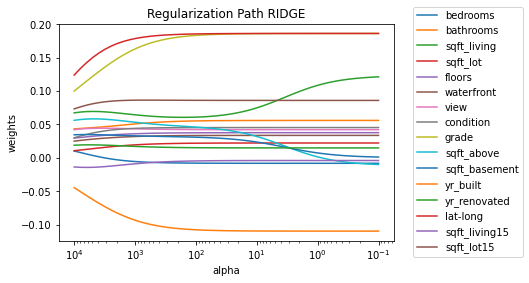

In [ ]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
X_c = X.copy()
X_c = X_c.drop('intercept', axis=1)
Xtrain = X_c[istrain]
ytrain = y[istrain]
names_regressors =["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long","sqft_living15","sqft_lot15"]
alphas_ = np.logspace(4,-1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    #print(alphas_.shape)
    #print(y_arr.shape)
    plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(bbox_to_anchor=(1.1, 0.9, 0.3, 0.2), loc=0)
plt.show()

Los pesos se van regularizando a medida que avanza alpha, todos tienden a 0.

> h) Ajuste un modelo lineal utilizando el método "Lasso", es decir, regularizando con la norma L1. Utilice
valores del parámetro de regularización $\lambda$ en el rango $[10^1; 10^{-2}]$. Para obtener el código, modifique
las líneas 7 y 9 del ejemplo anterior. Construya un gráfico que muestre los coeficientes obtenidos
como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo Lasso para
seleccionar atributos?
```python
from sklearn.linear_model import Lasso
alphas_ = np.logspace(0,-3,base=10)
clf = Lasso(fit_intercept=True)
```

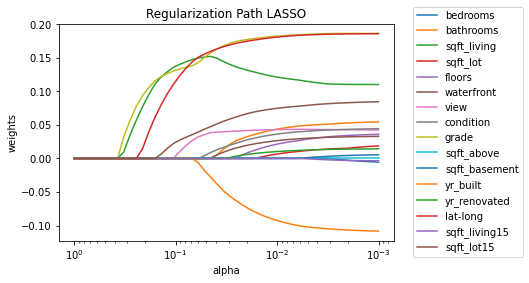

In [ ]:
from sklearn.linear_model import Lasso
import matplotlib.pylab as plt
X_c = X.copy()
X_c = X_c.drop('intercept', axis=1)
Xtrain = X_c[istrain]
ytrain = y[istrain]
names_regressors =["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long","sqft_living15","sqft_lot15"]
alphas_ = np.logspace(0,-3,base=10)
coefs = []
clf = Lasso(fit_intercept=True)
for a in alphas_:
    clf.set_params(alpha=a)
    clf.fit(Xtrain, ytrain)
    coefs.append(clf.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    #print(alphas_.shape)
    #print(y_arr.shape)
    plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path LASSO')
plt.axis('tight')
plt.legend(bbox_to_anchor=(1.1, 0.9, 0.3, 0.2), loc=0)
plt.show()

Con Lasso, a mayor alfa todos los pesos cayeron a 0

> i) Utilizando "Ridge Regression", construya un gráfico que muestre el error de entrenamiento y el error
de pruebas como función del parámetro de regularización. Discuta lo que observa.
```python
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=2)
ax.set_xscale(log)
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()
```

In [ ]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
X_c = X.copy()
X_c = X_c.drop('intercept', axis=1)

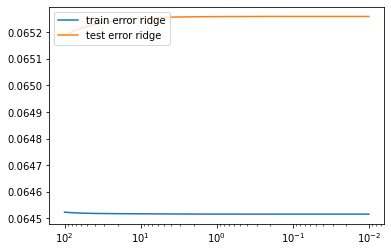

In [ ]:
Xtest = X_c[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

>  j) Utilizando "Lasso", construya un gráfico que muestre el error de entrenamiento y el error de pruebas
como función del parámetro de regularización. Discuta lo que observa.

```python
1 alphas_ = np.logspace(0.5,-2,base=10)
```

In [ ]:
from sklearn.linear_model import Lasso
import matplotlib.pylab as plt
X_c = X.copy()
X_c = X_c.drop('intercept', axis=1)

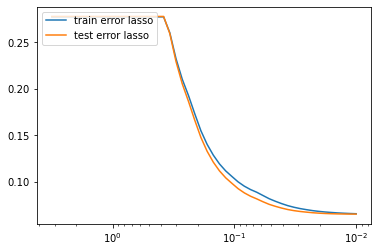

In [ ]:
Xtest = X_c[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(0.5,-2,base=10)
coefs = []
clf = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    clf.set_params(alpha=a)
    clf.fit(Xtrain, ytrain)
    yhat_train = clf.predict(Xtrain)
    yhat_test = clf.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error lasso')
ax.plot(alphas_,mse_test,label='test error lasso')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

<a id="segundo"></a>
## 2. Clasificación de datos no-linealmente separables

Algunos modelos de clasificación buscan implicita o explicitamente separar los datos linealmente, es decir ajustar un hiperplano que separe en 2 subespacios el espacio de las variables, separando ambas clases del _target_. Sin embargo en la mayoría de los casos reales esto resulta imposible. Esto no significa que no podamos ajustar modelos con estos datos o buscar transformaciones que nos permitan utilizarlos. 
    
![Alt Text](http://people.cs.uchicago.edu/~dinoj/manifold/swissroll.gif) 

[comment]: <> (Swiss Roll)

En esta primera parte de la tarea crearemos manualmente un set de datos categóricos no linealmente separables. Este se conformará de puntos en $\mathbb{R}^2$, pertenecientes a una de dos categorías etiquetadas 0 o 1, los cuales se encuentran "anidados". Probaremos distintas aproximaciones lineales y no lineales y compararemos sus desempeños.

#### a) Crear el conjunto de datos
La función `do_circles` retorna un conjunto de puntos etiquetados, donde la etiqueta 0 corresponde a puntos siguiendo una circunferencia (con un ruido asociado) y la etiqueta 1 a puntos dentro de esa circunferencia.

Los parametros de esta función tienen nombres intencionalmente no descriptivos. 

* Analice la función y comente interpretación puede darle a cada uno de los parámetros con respecto a la influencia que tendrán en el set de datos obtenidos. Si lo estima conveniente, cambie el nombre de los parámetros a nombres más descriptivos.

```python
def do_circles(n_dots = 3000, ns = 0.15, scr = 0.3, cf = 1):
    generator = check_random_state(42)
    
    linspace = np.linspace(0, 2*cf*np.pi, n_dots)
    circle_x = np.cos(linspace)
    circle_y = np.sin(linspace)

    inner_circle_x, outer_circle_x, inner_circle_y, outer_circle_y = train_test_split(circle_x, circle_y, test_size = 0.5)
    inner_circle_x , inner_circle_y = inner_circle_x*scr , inner_circle_y*scr 

    X = np.vstack((
        np.append(outer_circle_x, inner_circle_x),
        np.append(outer_circle_y, inner_circle_y)
    )).T

    y = np.hstack([
        np.zeros(n_dots // 2, dtype=np.intp),
        np.ones(n_dots // 2, dtype=np.intp)
    ])

    X += generator.normal(scale = ns, size = X.shape)
    return train_test_split(X, y, test_size=0.3, random_state=42)
```

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

def do_circles(n_dots = 3000, ns = 0.15, scr = 0.3, cf = 1):
    generator = check_random_state(42)

    linspace = np.linspace(0, 2*cf*np.pi, n_dots)
    circle_x = np.cos(linspace)
    circle_y = np.sin(linspace)

    inner_circle_x, outer_circle_x, inner_circle_y, outer_circle_y = train_test_split(circle_x, circle_y, test_size = 0.5)
    inner_circle_x , inner_circle_y = inner_circle_x*scr , inner_circle_y*scr

    X = np.vstack((
        np.append(outer_circle_x, inner_circle_x),
        np.append(outer_circle_y, inner_circle_y)
    )).T

    y = np.hstack([
        np.zeros(n_dots // 2, dtype=np.intp),
        np.ones(n_dots // 2, dtype=np.intp)
    ])

    X += generator.normal(scale = ns, size = X.shape)
    return train_test_split(X, y, test_size=0.3, random_state=42)

<p style="font-family: Comic Sans MS">Analizando el código, intenté ejecutarlo, primero me marcó errores nombres indefinidos, por lo que revisé y me di cuenta que hacía falta agregar algunas librerías, por lo que puse el siguiente código de cabecera:</p>

```python
    from sklearn.model_selection import train_test_split
    from sklearn.utils import check_random_state
```

<p style="font-family: Comic Sans MS">Con eso, pude ejecutar el código, al parecer genera una especie de dona, ya que no es un circulo delgado.</p>
<p style="font-family: Comic Sans MS">Después revisando los parámetros de la función tenemos:</p>


```python
    def do_circles(n_dots = 3000, ns = 0.15, scr = 0.3, cf = 1):
```
Nombres:
<ul>
    <li>do_circles: Nombre de la función</li>
    <li>n_dots: Por el nombre se infiere que es la cantidad de puntos</li>
    <li>ns: Corresponde al ancho de la linea del circulo, o también a la dispersión con respecto al circulo</li>
    <li>scr: Corresponde a la separación de ambos conjuntos</li>
    <li>cf: Corresponde a la cantidad de grados que se muestra del circulo</li>
</ul>

<p style="font-family: Comic Sans MS">Después tenemos el código de la función, lo dividiremos para explicar que hace cada linea o cada conjunto de lineas</p>

```python
    generator = check_random_state(42)
```
<p style="font-family: Comic Sans MS">Se crea una variable de nombre generator con la asignación de valor de check_random_state lo que crea un generador de estados random, al poseer número, este actuará de semilla(seed) y dejará valores fijos para cada semilla, si se cambia el valor de la semilla, esto también cambiará el valor de generator, el nro 42 puede ser una referencia a la Guía del autoestopista galáctico de Douglas Adams</p>

```python
    linspace = np.linspace(0, 2*cf*np.pi, n_dots)
```
<p style="font-family: Comic Sans MS">np.linspace retorna una cantidad de valores(n_dots) entre un intervalo dado, en este caso desde cero a 2*cf*&#928;</p>


```python
    circle_x = np.cos(linspace)
    circle_y = np.sin(linspace)
```
<p style="font-family: Comic Sans MS">
    ambas lineas de código lo que intentan hacer darles una posición en los ejes x e y a los valores de linspace
</p>

```python
    inner_circle_x, outer_circle_x, inner_circle_y, outer_circle_y = train_test_split(circle_x, circle_y, test_size = 0.5)
    inner_circle_x , inner_circle_y = inner_circle_x*scr , inner_circle_y*scr 
```
<p style="font-family: Comic Sans MS">
    por lo que entiendo, se le pasa a train test split dos tablas y un tamaño de test, donde se indica que la mitad de los nros serán para test y los otros de training, posteriormente los resultados de train_test_split se almacenarán en las siguientes variables
<ul>
    <li>
        inner_circle_x: Coordenada X del interior del circulo, dato de predicción
    </li>
    <li>
        inner_circle_y: Coordenada Y del interior del circulo, dato de predicción
    </li>
    <li>
        outer_circle_x: Coordenada X del exterior del circulo, dato para test
    </li>
    <li>
        outer_circle_y: Coordenada X del exterior del circulo, dato para test
    </li>
</ul>
</p>

```python
    X = np.vstack((
        np.append(outer_circle_x, inner_circle_x),
        np.append(outer_circle_y, inner_circle_y)
    )).T
```
<p style="font-family: Comic Sans MS">
    Se crea una variable de nombre X de tipo Numpy Vertical Stack la cual se le anidan las coordenadas de las variables de recién, las cuales son outer_circle e inner_circle
</p>
```python
    y = np.hstack([
        np.zeros(n_dots // 2, dtype=np.intp),
        np.ones(n_dots // 2, dtype=np.intp)
    ])
```
```python

    X += generator.normal(scale = ns, size = X.shape)
```


```python
return train_test_split(X, y, test_size=0.3, random_state=42)
```

In [ ]:
# bloque para testear variables

#### b) Graficar los datos
Cree una función que grafique los datos, coloreando distintamente los puntos de cada clase. 
Utilice esta función para verificar gráficamente lo que propuso en la pregunta anterior.

```python
def plot_circles( . . . . ):
    # . . . 
    fig1 = fig.add_subplot(121)
    fig1.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1])
    # . . . 
    fig1.set_title("Train Set")
    # . . .
```

In [ ]:
import matplotlib.pyplot as plt



In [ ]:
def plot_circles(X_train, X_test, y_train, y_test):
    fig=plt.figure()
    fig1 = fig.add_subplot(121)
    fig1.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1],c="red")
    fig1.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1],c="green")
    fig1.set_title("Train Set")

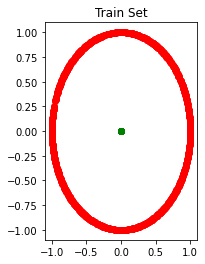

In [ ]:
X_train, X_test, y_train, y_test = do_circles(3000, 0,0,1)
plot_circles(X_train, X_test, y_train, y_test)

Si NS = 0, entonces el gráfico genera un circulo de linea de contorno delgada

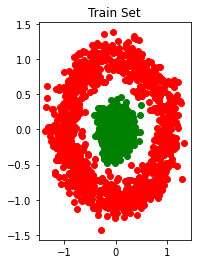

In [ ]:
X_train, X_test, y_train, y_test = do_circles(3000, 0.15,0,1)
plot_circles(X_train, X_test, y_train, y_test)

En cambio si NS > 0; entonces la linea se hace mas ancha y los datos se dispersan más

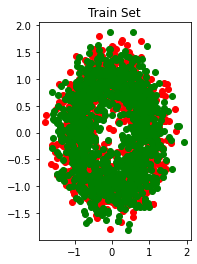

In [ ]:
X_train, X_test, y_train, y_test = do_circles(3000, 0.3,1,1)
plot_circles(X_train, X_test, y_train, y_test)

se Usa NS para separar los conjuntos graficados

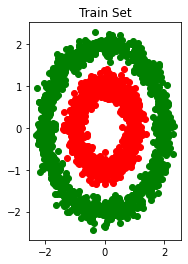

In [ ]:
X_train, X_test, y_train, y_test = do_circles(3000, 0.15,2,1)
plot_circles(X_train, X_test, y_train, y_test)

al alterar scr, separa el conjunto 2 del conjunto 1

#### c) Regresión Logística

Realice una regresión logistica para a lo menos 5000 puntos generados con los siguientes parámetros:
* `do_circles(n_dots, 0.2, 0.3, 1)`
* `do_circles(n_dots, 0, 0.3, 1)`

Grafique los datos que está ajustando y calcule el _score_ del regresor logístico en cada caso.
¿Qué valor entrega el _score_ del regresor logístico? Le parece un buen desempeño para la tarea a realizar?

```python
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# . . .
```

In [ ]:
n_dots=5000
x1_train, x1_test, y1_train, y1_test = do_circles(n_dots, 0.2, 0.3, 1)
x2_train, x2_test, y2_train, y2_test = do_circles(n_dots, 0, 0.3, 1)
#fit
#predict
#

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg1 = LogisticRegression()
log_reg1.fit(x1_train, y1_train)
log_reg2 = LogisticRegression()
log_reg2.fit(x2_train, y2_train)


LogisticRegression()

In [ ]:
log_reg1.score(x1_train, y1_train)


0.5705714285714286

In [ ]:
log_reg2.score(x2_train, y2_train)

0.5985714285714285

#### d) Gráficos
Para entender mejor lo que está ocurriendo con el clasificador en cada uno de los casos, grafícaremos los datos clasificados y la frontera de desición ajustada por el modelo. Para esto complete la función siguiente y luego utilicela para ambos modelos y conjuntos de datos ajustados en la pregunta anterior. 

¿Qué puede concluir luego de estas visualizaciones? ¿Es posible mejorar el desempeño de algun clasificador lineal sin hacer una transformación de los datos? ¿Qué ocurre con el clasificador si disminuimos el ruido, mejora realmente su desempeño? 

```python
def plot_classifier(classifier, X_train, Y_train, X_test, Y_test, train_or_test='test'):
    plt.figure(figsize=(12, 8))
    axis = plt.axes()
    if tr_tst == 'train':
        # Scatter train points (axis.scatter(. . .)) 
    elif tr_tst == 'test':
        # Scatter test points
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j] # grid for cassifier
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # what the classifier predicts over the space
    Z = Z.reshape(XX.shape) # for consistency
    Zplot = Z > 0.5 # to separate both classes
    axis.pcolormesh(XX, YY, Zplot, cmap='YlGn')
    axis.contour(XX, YY, Zplot, alpha=1, colors=["r"], linestyles=["-"], levels=[0.5])
    plt.show()
```

Para las siguientes preguntas nos enfocaremos **solo en la versión con ruido de los datos** pues en la práctica no existen datos sin ruido. Probaremos algunos métodos no lineales para ver que tanto logramos mejorar el desempeño en nuestros datos. 

In [ ]:
def plot_classifier(clf, X_train, Y_train, X_test, Y_test, train_or_test='test'):
    plt.figure(figsize=(12, 8))
    axis = plt.axes()
    if train_or_test == 'train':
        for i in range(len(X_train)):
            axis.scatter(X_train[i][0],X_train[i][1])
    elif train_or_test == 'test':
        for i in range(len(X_test)):
            axis.scatter(X_test[i][0],X_test[i][1])
        # Scatter test points
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j] # grid for cassifier
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # what the classifier predicts over the space
    Z = Z.reshape(XX.shape) # for consistency
    Zplot = Z > 0.5 # to separate both classes
    axis.pcolormesh(XX, YY, Zplot, alpha=0.3, cmap='YlGn')
    axis.contour(XX, YY, Zplot, alpha=1, colors=["r"], linestyles=["-"], levels=[0.5])
    plt.show()

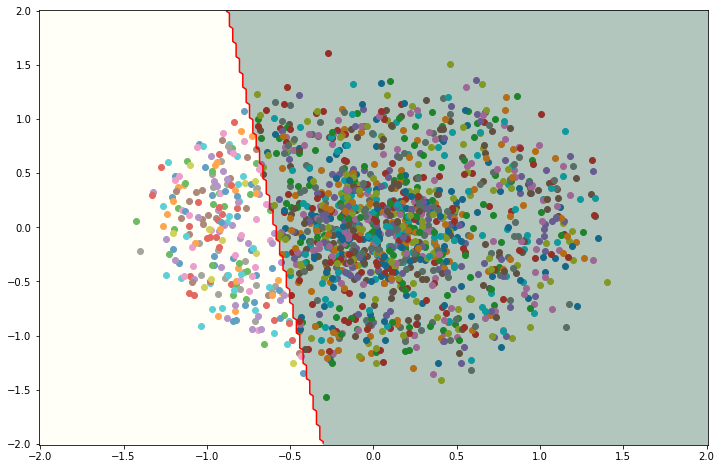

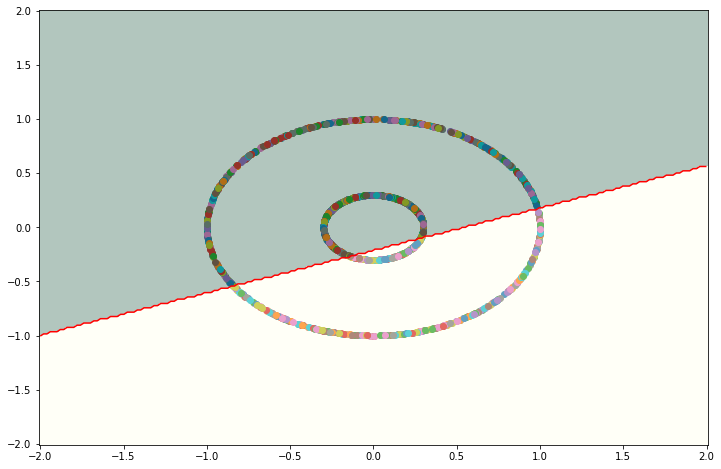

In [ ]:

plot_classifier(log_reg1,x1_train,y1_train,x1_test,y1_test)
plot_classifier(log_reg2,x2_train,y2_train,x2_test,y2_test)

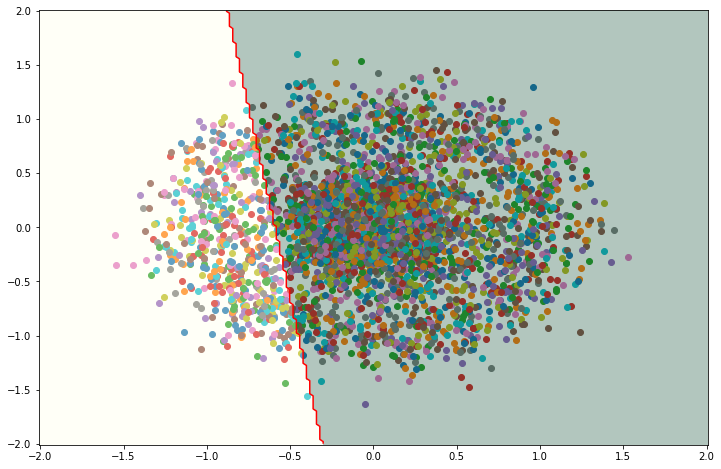

In [ ]:
isTraining = 'train'
plot_classifier(log_reg1,x1_train,y1_train,x1_test,y1_test,isTraining)
plot_classifier(log_reg2,x2_train,y2_train,x2_test,y2_test,isTraining)


#### e) SVM

Entrene un clasificador SVM con los datos con ruido. ¿Qué forma tiene la frontera de desición esta vez? 

¿Mejoran los resultados al alejarse de los métodos puramente lineales? Comente sobre el desempeño del modelo y su sensibilidad a los parámetros `C` y `gamma`, explorando como cambia la frontera de desición al variar estos parámetros. 

```python
from sklearn.svm import SVC
SV = SVC(C=1, gamma=5)
```

#### f) KNN
Pruebe ahora con otro método no linal, _K nearest neighbors_ o KNN. Discuta sus resultados y la frontera de desición que encuentra el modelo. 

Realice un _Cross Validation_ sobre el parámetro `n_neighbors` o `p` (o ambos usando un mallado) y comente si mejoran significativamente los resultados. Puede apoyarse de los códigos de la tarea 1 para realizar el _Cross Validation_.
¿Qué representan estos parámetros para el metodo?

```python
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5, p=2)
```

<a id="tercero"></a>
## 3. Calidad del vino

Dentro de las variedades del vino, existen distintas calidades de este, donde algunos gustan mas a algunas
personas que otras, esto depende de la gran cantidad de químicos y procesos que se aplican a la producción
de vino. Para el área de negocios el estimar cuál es la calidad del vino en base a la apreciación de la gente es
una tarea bastante difícil.
Para esta actividad se trabajará con dos datasets asociados a variantes tinto y blanco del vino Portugués
”Vinho Verde” (http://archive.ics.uci.edu/ml/datasets/Wine+Quality). Debido a temas privados solo se cuenta atributos fisioquímicos asociados a un vino en particular, los cuales corresponden a 11 atributos numéricos descritos en el siguiente link.
Este problema puede ser abordado como clasificación de 11 clases o de regresión, ya que el atributo a estimar,
la calidad quality, es un valor entero entre 0 y 10.

<img src="https://images.unsplash.com/photo-1506377247377-2a5b3b417ebb?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max&ixid=eyJhcHBfaWQiOjExNzczfQ" title="Title text" width="40%"/>




a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si
es vino tinto o blanco. Describa el dataset a trabajar.
```python
import pandas as pd
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")
df = pd.concat([df_red,df_white], axis=0)
#genere atributo ’tipo’
```

In [ ]:
import pandas as pd
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")
df_red = df_red.assign(wineType=0)
df_white = df_white.assign(wineType=1)
df_wine = pd.concat([df_red,df_white], axis=0, ignore_index=True)


In [ ]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wineType
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wineType              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


df_wine.info() muestra información de la variable

In [ ]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wineType
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


df_wine.describe() muestra las estadísticas del data frame

b) Aborde este problema como si fuera de clasificación binaria para predecir si un vino es de calidad o
no, es decir, utilice las distintas características fisioquímicas presentes en los datos para estimar esta
etiqueta. Para esto cree las matrices de entrenamiento y de pruebas, además de la etiqueta para ambos
conjuntos, considerando como quality mayor a 5 un vino de buena calidad. El conjunto de pruebas
(25 %) será utilizado únicamente para verificar la calidad de los algoritmos a entrenar.

```python
1 df[’good_quality’] = [1 if q>5 else 0 for q in df.quality]
2 #train and test split over df
```

In [ ]:
df_wine['premiumQuality'] = [1 if q>5 else 0 for q in df_wine.quality]
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wineType,premiumQuality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,1


si la calidad es mayor a 5, se puede considerar vino premium, o de calidad superior

In [ ]:
import pandas as pd # ejecutar solo si no se ha ejecutado previamente

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # banana_split

df_wine_premium_quality = df_wine['premiumQuality']
df_wine_noquality = df_wine.drop(['quality','premiumQuality'],axis=1)
scaler = StandardScaler()
df_wine_fit = pd.DataFrame(scaler.fit_transform(df_wine_noquality), columns=df_wine_noquality.columns)

x_wine_train, x_wine_test, y_wine_train, y_wine_test = train_test_split(df_wine_fit,df_wine_premium_quality, test_size = 0.25, random_state = 42)

Acá separamos

In [ ]:
x_wine_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wineType
1539,-0.011808,0.305752,0.009406,-0.765798,0.255949,0.195778,-0.986324,0.814879,1.502096,1.671647,-0.496219,-1.750190
1109,2.765254,0.791708,0.766426,-0.702739,3.281849,-0.198632,-0.880162,1.168395,-0.301669,1.537233,0.258422,-1.750190
100,0.836739,1.642132,-0.128234,-0.702739,0.798328,-1.100140,-1.163260,0.834889,1.128903,0.529131,-0.244672,-1.750190
5477,-0.551792,0.062773,-0.059414,0.999859,0.370134,1.548041,0.959976,0.741507,-0.239471,-0.277351,-0.915464,0.571367
6416,-1.091777,0.275379,-0.472334,-0.366423,-0.714622,0.421155,0.110681,-1.139470,-0.115073,0.663545,0.593818,0.571367
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.296754,-0.119460,1.798725,2.376650,-0.172244,0.702877,0.836120,1.735356,-0.426067,0.058683,-1.083162,0.571367
5191,-1.246058,-0.362438,-0.334694,-0.324384,-0.372068,1.209975,0.747652,-0.892675,0.817909,-0.613385,0.174573,0.571367
5226,-0.628933,0.184263,-0.816433,0.032951,1.740353,1.717074,1.189993,-0.035563,0.133722,-0.680592,-0.831615,0.571367
5390,-0.551792,-0.483928,1.248165,0.537425,-0.143698,0.871910,1.437704,0.221237,-0.239471,-0.411765,-0.831615,0.571367


In [ ]:
x_wine_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wineType
3103,-0.166089,-1.030629,2.899845,1.546371,-0.314975,-0.367664,0.181456,-0.165631,0.258120,-1.016626,1.432308,0.571367
1419,0.373895,1.824366,-0.747613,-0.681719,0.598504,0.083090,0.305311,0.301278,0.320319,-0.546178,-0.496219,-1.750190
4761,-0.320370,0.305752,0.147046,0.411306,-1.028631,0.421155,0.305311,-0.859324,-0.239471,-0.613385,1.264610,0.571367
4690,-0.706073,-0.362438,1.041706,1.210056,-0.457706,1.717074,1.189993,0.408001,-0.612663,-0.142937,-0.831615,0.571367
4032,0.142473,0.062773,-0.816433,1.777588,-0.058059,1.829762,2.003900,1.395180,-0.674862,-0.210144,-1.334709,0.571367
...,...,...,...,...,...,...,...,...,...,...,...,...
4509,-0.860355,0.184263,-0.816433,0.453346,-0.714622,1.040942,0.959976,0.294608,0.009325,-0.344558,-0.831615,0.571367
3350,-0.397511,-1.091373,-0.265874,-0.618660,-0.286429,0.533844,0.659184,-0.865994,1.004505,-0.142937,0.761516,0.571367
1730,-0.551792,-0.605417,0.009406,0.453346,-0.514799,0.984598,1.543866,0.367980,1.439897,0.058683,-0.663917,0.571367
2225,0.296754,1.338409,-1.366993,1.041898,1.140882,-0.480353,1.083831,1.201746,0.631312,-0.546178,-1.167011,0.571367


In [ ]:
y_wine_train

1539    0
1109    1
100     1
5477    0
6416    1
       ..
3772    0
5191    1
5226    0
5390    0
860     0
Name: premiumQuality, Length: 4872, dtype: int64

In [ ]:
y_wine_test

3103    1
1419    0
4761    1
4690    1
4032    1
       ..
4509    0
3350    1
1730    1
2225    0
5230    1
Name: premiumQuality, Length: 1625, dtype: int64

c) Entrene un solo Arbol de Clasificación de múltiples niveles para resolver el problema. Puede variar los
hiper-parámetros que prefiera, recuerde que las decisiones no pueden ser basadas mirando el conjunto
de pruebas. Debido al desbalanceo que se produce en las dos clases mida la métrica F1-score https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html sobre
el conjunto de entrenamiento y de pruebas.

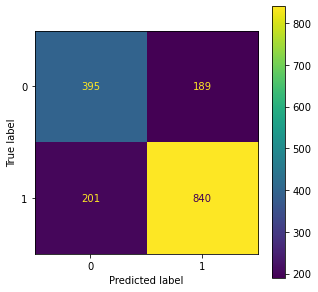

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as decisive
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
wine_quality_tree = decisive(random_state=42)
wine_quality_tree.fit(x_wine_train,y_wine_train)
wine_quality_predict = wine_quality_tree.predict(x_wine_test)
wine_confusion = confusion_matrix(y_wine_test,wine_quality_predict)
disp = ConfusionMatrixDisplay(wine_confusion)
disp.plot()
plt.show()

In [ ]:
wine_confusion

array([[395, 189],
       [201, 840]], dtype=int64)

In [ ]:
from sklearn.metrics import f1_score

result_f1 = f1_score (y_wine_test, wine_quality_predict)
print("Metrica de F1: ", result_f1)

Metrica de F1:  0.8115942028985509


d) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de Random Forest. Varíe la
cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen
del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.

```python
1 from sklearn.ensemble import RandomForestClassifier
2 model = RandomForestClassifier(n_estimators=, max_depth=,n_jobs=-1)
```

In [ ]:
import random as rnd

In [ ]:
#Versión antigua, no ejecutar
from sklearn.ensemble import RandomForestClassifier

rforest1 = RandomForestClassifier(n_estimators=2,n_jobs=-1)
rforest2 = RandomForestClassifier(n_estimators=5,n_jobs=-1)
rforest3 = RandomForestClassifier(n_estimators=15,n_jobs=-1)

rforest1.fit(x_wine_train, y_wine_train)
rforest2.fit(x_wine_train, y_wine_train)
rforest3.fit(x_wine_train, y_wine_train)

predict_rforest1 = rforest1.predict(x_wine_test)
predict_rforest2 = rforest2.predict(x_wine_test)
predict_rforest3 = rforest3.predict(x_wine_test)

graph1_rf_f1  = f1_score(y_wine_test, predict_rforest1, average='macro')
graph2_rf_f1  = f1_score(y_wine_test, predict_rforest2, average='macro')
graph3_rf_f1  = f1_score(y_wine_test, predict_rforest3, average='macro')

El bloque de arriba corresponde a una manera bruta y arcaica de realizar el código, el siguiente bloque es la forma optimizada

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rforest = []
predict_rforest = []
graph_rf_f1 = []

rforest.append(RandomForestClassifier(n_estimators=2,n_jobs=-1))
rforest.append(RandomForestClassifier(n_estimators=4,n_jobs=-1))
rforest.append(RandomForestClassifier(n_estimators=15,n_jobs=-1))

for i in range(len(rforest)):
    rforest[i].fit(x_wine_train,y_wine_train)
    predict_rforest.append(rforest[i].predict(x_wine_test))
    graph_rf_f1.append(f1_score(y_wine_test,predict_rforest[i], average="macro"))

In [ ]:
De esta manera puedo agregar todos los rforest que desee y el código va a tratar cantidades indefinidas de listas

0.7945290097054857

In [ ]:
import matplotlib.pylab as plt

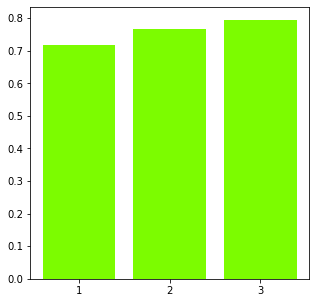

[0.7188607256219088, 0.7681309691412046, 0.7945290097054857]


In [ ]:
# plt.bar(range(1,4),[graph1_rf_f1,graph2_rf_f1,graph3_rf_f1], color="green")

plt.bar(range(1,len(graph_rf_f1)+1),graph_rf_f1, color="lawngreen")
plt.xticks(np.arange(1, len(graph_rf_f1)+1, step=1))
plt.show()
print(graph_rf_f1)

In [ ]:
por lo visto 

SyntaxError: invalid syntax (269350156.py, line 1)

e) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de AdaBoost. Varíe la
cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen
del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con
la técnica utilizada en d).

```python
1 from sklearn.ensemble import AdaBoostClassifier
2 model = AdaBoostClassifier(base_estimator=Tree(max_depth=), n_estimators=)
```

In [ ]:
#Manera antigua y poco óptima
from sklearn.ensemble import AdaBoostClassifier
adaBoost1 = AdaBoostClassifier(n_estimators=5)
adaBoost2 = AdaBoostClassifier(n_estimators=18)
adaBoost3 = AdaBoostClassifier(n_estimators=25)

adaBoost1.fit(x_wine_train, y_wine_train)
adaBoost2.fit(x_wine_train, y_wine_train)
adaBoost3.fit(x_wine_train, y_wine_train)

predict_adaBoost1 = adaBoost1.predict(x_wine_test)
predict_adaBoost2 = adaBoost2.predict(x_wine_test)
predict_adaBoost3 = adaBoost3.predict(x_wine_test)

graph1_ab_f1  = f1_score(y_wine_test, predict_adaBoost1, average='macro')
graph2_ab_f1  = f1_score(y_wine_test, predict_adaBoost2, average='macro')
graph3_ab_f1  = f1_score(y_wine_test, predict_adaBoost3, average='macro')

El bloque de arriba, al igual que en la pregunta D, es ka versión antigua y un tanto arcaica, el bloque siguiente contiene  la versión mejorada la cual es escalable a cualquier cantidad de elementos en la lista adaBoost,

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = []
predict_adaBoost = []
graph_ab_f1 = []

adaBoost.append(AdaBoostClassifier(n_estimators=5))
adaBoost.append(AdaBoostClassifier(n_estimators=15))
adaBoost.append(AdaBoostClassifier(n_estimators=25))

for i in range(len(adaBoost)):
    adaBoost[i].fit(x_wine_train,y_wine_train)
    predict_adaBoost.append(adaBoost[i].predict(x_wine_test))
    graph_ab_f1.append(f1_score(y_wine_test,predict_adaBoost[i], average="macro"))

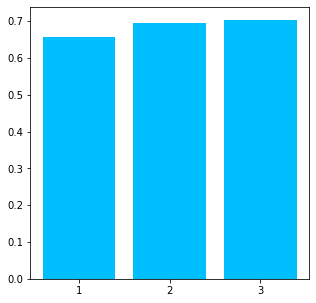

[0.6580055829027764, 0.6942007995530314, 0.7034110764710172]


In [ ]:
#plt.bar(range(1,4),[graph1_ab_f1, graph2_ab_f1, graph3_ab_f1], color="blue")
plt.bar(range(1,len(graph_rf_f1)+1),graph_ab_f1, color="deepskyblue")
plt.xticks(np.arange(1, 4, step=1))
plt.show()
print(graph_ab_f1)

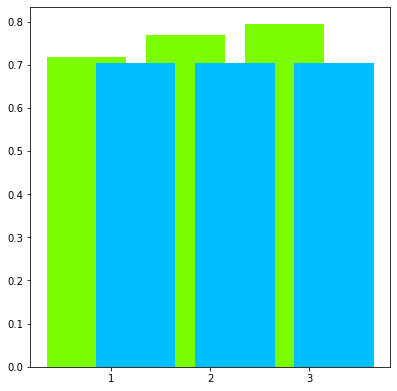

In [ ]:
fig = plt.figure()
fig1 = fig.add_axes([0,0,1,1])

for i in range(len(graph_rf_f1)):
    fig1.bar(i+0.75,graph_rf_f1[i], color="lawngreen")
for i in range(len(graph_ab_f1)):
    fig1.bar(i+1.25,graph_ab_f1, color="deepskyblue")
    
plt.xticks(np.arange(1, max(len(graph_rf_f1)+1,len(graph_ab_f1)+1)))
plt.show()


In [ ]:
len(l_rforest)

3

In [ ]:
# Versión antigua, no es óptimo usarla y fue antes de optimizar el código
fig = plt.figure()
fig1 = fig.add_axes([0,0,1,1])

l_rforest  = []
l_adaboost = []

l_rforest.append(graph1_rf_f1)
l_rforest.append(graph2_rf_f1)
l_rforest.append(graph3_rf_f1)

l_adaboost.append(graph1_ab_f1)
l_adaboost.append(graph2_ab_f1)
l_adaboost.append(graph3_ab_f1)

numtags = np.arange(1,3)

for i in range(len(l_rforest)):
    fig1.bar(i+0.75,l_rforest[i], color="green")
for i in range(len(l_adaboost)):
    fig1.bar(i+1.25,l_adaboost[i], color="orangered")
    
plt.xticks(np.arange(1, 4, step=1))
plt.show()
